In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_result(class_num,ins_num):
    result = [tuple(np.random.randint(0,class_num,2)) for i in range (ins_num)]
    return result

In [3]:
method1 = generate_result(3, 20)
print(method1)

[(2, 1), (0, 0), (2, 0), (1, 0), (2, 0), (2, 1), (0, 0), (1, 1), (2, 2), (1, 0), (1, 1), (2, 0), (0, 2), (1, 1), (1, 0), (0, 1), (1, 2), (0, 1), (2, 1), (2, 1)]


In [4]:
method2 = generate_result(3, 20)
print(method2)

[(1, 2), (2, 1), (1, 1), (2, 2), (0, 0), (0, 2), (1, 1), (0, 2), (2, 2), (1, 0), (1, 2), (2, 2), (0, 2), (0, 0), (2, 0), (2, 1), (1, 0), (0, 0), (0, 0), (1, 2)]


In [5]:
class Evaluation:
    num_of_class = 0
    num_of_inst = 0
    result = []
    multiclass_matrix=None
    correct_pre = []
    actual_num = []
    predict_num = []
    
    def __init__(self,result,num_of_class):
        self.result = result
        self.num_of_class = num_of_class
        self.num_of_inst = len(result)
        self.multiclass_matrix = self.generate_matrix()
        self.precess_matrix()
    
    def generate_matrix(self):
        matrix = np.zeros((self.num_of_class, self.num_of_class))
        for tup in self.result:
            matrix[tup[0]][tup[1]]+=1
        return matrix
    
    def precess_matrix(self):
        self.correct_pre = [self.multiclass_matrix[i][i] for i in range(self.num_of_class)]
        self.actual_num = [self.multiclass_matrix[i].sum() for i in range(self.num_of_class)]
        self.predict_num = [self.multiclass_matrix[:,i].sum() for i in range(self.num_of_class)]
    
    
    def calculate_accuracy(self):
        accuracy = sum(self.correct_pre)/sum(self.actual_num)
        return accuracy
    
    def calculate_Macro_value(self):
        ###precision###
        precision = sum([self.correct_pre[i]/self.predict_num[i] for i in range(self.num_of_class)])/self.num_of_class
        ###recall###
        recall = sum([self.correct_pre[i]/self.actual_num[i] for i in range(self.num_of_class)])/self.num_of_class
        return [precision, recall]
    
    
    def calculate_Micro_value(self):
        ###precision###
        precision = sum(self.correct_pre)/sum(self.predict_num)
        ###recall###
        recall = sum(self.correct_pre)/sum(self.actual_num)
        return [precision, recall]
    
    def calculate_weight_value(self):
        ###precision###
        precision = sum([(self.actual_num[i]/self.num_of_inst)*(self.correct_pre[i]/self.predict_num[i])for i in range(self.num_of_class)])
        ###recall###
        recall = sum([(self.actual_num[i]/self.num_of_inst)*(self.correct_pre[i]/self.actual_num[i])for i in range(self.num_of_class)])
        return [precision, recall]
        
        
    def draw_heatmap_d(self):
        sns.heatmap(self.multiclass_matrix, vmin=0, vmax=len(self.result), annot=True,cmap="RdPu_r", fmt='.20g')
        plt.show()
        
    def draw_heatmap_f(self):
        sns.heatmap(self.multiclass_matrix/len(self.result), vmin=0, vmax=1, annot=True,cmap="RdPu_r", fmt='.2g')
        plt.show()  
        
    def draw_bar_chart(self):
        names = ["calss"+str(i) for i in range(self.num_of_class)]
        plt.figure(figsize=(10,6), dpi=80)
        x = range(len(names))
        
        plt.bar(x, self.actual_num, width=0.1)
        plt.bar([i + 0.1 for i in x], self.predict_num, width=0.1)
        plt.bar([i + 0.2 for i in x], self.correct_pre, width=0.1)

        plt.xticks([i + 0.05 for i in x], names)
        
        plt.xlabel('Class Name', fontsize=14)
        plt.ylabel('Number Of Each Class', fontsize=14)
        plt.show()
        
        
    def evaluate(self):
        ################################Calculate Accuracy##################################
        accuracy = self.calculate_accuracy()
        
        print("accuracy is: %f" %accuracy)
        print("error rate is: %f"%(1-accuracy))

        ##macro averaging
        precisionMa, recallMa = self.calculate_Macro_value()
        print("Marco averaging precision is: %f" %precisionMa)
        print("Marco averaging recall is: %f" %recallMa)
        
        #micro averaging
        precisionMi, recallMi = self.calculate_Micro_value()
        print("Mirco averaging precision is: %f" %precisionMi)
        print("Mirco averaging recall is: %f" %recallMi)
        
        #weight averaging
        precisionWe, recallWe = self.calculate_weight_value()
        print("weight averaging precision is: %f" %precisionWe)
        print("weight averaging recall is: %f" %recallWe)
        
        ###################################Draw Graphs######################################
        #self.draw_heatmap_d()
        #self.draw_heatmap_f()
        #self.draw_bar_chart()
        
        

In [6]:
evaluation1 = Evaluation(method1, 3)
evaluation2 = Evaluation(method2, 3)

In [7]:
#这里使用Macro Averaging
accuracy1 = evaluation1.calculate_accuracy()
accuracy2 = evaluation2.calculate_accuracy()
precision1,recall1 = evaluation1.calculate_Macro_value()
precision2,recall2 = evaluation2.calculate_Macro_value()

value_names = ['accuracy', 'precision','recall']
values1 = [accuracy1,precision1,recall1]
values2 = [accuracy2,precision2,recall2]

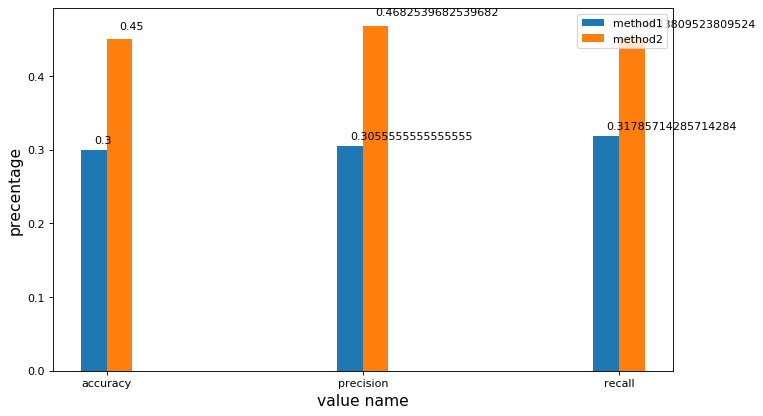

In [8]:
#draw the bar chart
plt.figure(figsize=(10,6), dpi=80)
x = range(len(value_names))

m1 = plt.bar(x, values1, width=0.1)
m2 = plt.bar([i + 0.1 for i in x], values2, width=0.1)

plt.xticks([i + 0.05 for i in x], value_names)
plt.legend((m1,m2),("method1","method2"), loc="upper right")

def autolabel(rects): 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % float(height))

autolabel(m1)
autolabel(m2)

plt.xlabel('value name', fontsize=14)
plt.ylabel('precentage', fontsize=14)
plt.show()
